# Weather Prediction Example
Start by loading historical weather data for a location

### This is what it looks like direct from spark
Without the sdk, use some common code to read a pandas dataframe from cassandra

In [1]:
#from iris.common import spark

In [2]:
#ss = spark.getSparkSession('modelDevelTest', numParts=64, maxCores='17', executorCores='1', executorMem='2g')

In [3]:
#weather = ss.read.format("org.apache.spark.sql.cassandra")\
#    .options(table="weather_noaa", keyspace="weather").load().persist()

In [4]:
# complete this section by fetching the data locally as a pandas data frame
#weatherLocal = weather.where('zipcode == 23250').toPandas()

## Get data from the SDK

In [5]:
import os
os.environ['TASK_ID'] = 'f4dac250-37f1-40c4-a34b-7507c5df909f'
os.environ['PROJECT_TOKEN'] = "abbd2b78c9167e7c6737e99f" 
os.environ['PROJECT_SECRET'] ="c790c753f35a7ee3945fc1eb25f049fc" 
os.environ['SKAFOS_ARKE_SERVICE_HOST'] = 'localhost'
os.environ['SKAFOS_ARKE_SERVICE_PORT'] = '8980'
os.environ['SKAFOS_MONITOR_SERVICE_HOST'] = 'localhost'
os.environ['SKAFOS_MONITOR_SERVICE_PORT'] = '80'

# don't forget sudo wscat -l 80

In [120]:
from skafossdk import *
print('initialize the SDK connection')
skafos = Skafos()

--- request header ---
GET /ws HTTP/1.1
Upgrade: websocket
Connection: Upgrade
Host: localhost:8980
Origin: http://localhost:8980
Sec-WebSocket-Key: Lf8c8GrKz2ZFQVh0258giA==
Sec-WebSocket-Version: 13


-----------------------


initialize the SDK connection


--- response header ---
HTTP/1.1 101 Switching Protocols
upgrade: websocket
connection: upgrade
sec-websocket-accept: Y8ZnasusIvhP2J5PuqpvUqRxjzM=
-----------------------
2017-12-05 15:41:31,939 - skafossdk.data_engine - INFO - DataEngine Connection Opened
2017-12-05 15:41:32,912 - skafossdk.monitor - WARNING - Disable Websocket Trace here
--- request header ---
GET /f4dac250-37f1-40c4-a34b-7507c5df909f HTTP/1.1
Upgrade: websocket
Connection: Upgrade
Host: localhost
Origin: http://localhost
Sec-WebSocket-Key: bMO7wOyQEDPfOJbNtAQcDA==
Sec-WebSocket-Version: 13


-----------------------
--- response header ---
HTTP/1.1 101 Switching Protocols
Upgrade: websocket
Connection: Upgrade
Sec-WebSocket-Accept: FRrt7hy4C8CfPiQE1gjZ7RzNjhA=
-----------------------
2017-12-05 15:41:33,489 - skafossdk.monitor - INFO - Monitor Connection Opened
2017-12-05 15:41:33,564 - skafossdk.monitor - ERROR - Connection is already closed.
2017-12-05 15:41:33,566 - skafossdk.monitor - INFO - Monitor Connection Cl

In [7]:
res = skafos.engine.create_view(
    "weather_noaa", {"keyspace": "weather",
                      "table": "weather_noaa"}, DataSourceType.Cassandra).result()
print("created a view of NOAA historial weather data")

-----------------------
2017-12-05 15:04:29,058 - skafossdk.data_engine - INFO - Creating View...
--- response header ---
2017-12-05 15:04:29,060 - skafossdk.data_engine - INFO - Sending msg...
HTTP/1.1 101 Switching Protocols
send: b"\x81\xfe\x01\xe4.\n\x82\xc7U(\xe4\xb5Ag\xa0\xfd\x0e(\xe4\xf3Jk\xe1\xf5\x1b:\xaf\xf4\x19l\xb3\xea\x1a:\xe1\xf3\x03k\xb1\xf3L'\xb5\xf2\x1e=\xe1\xf2Jl\xbb\xf7\x17l\xa0\xeb\x0e(\xef\xa2]y\xe3\xa0K(\xb8\xe7\x0co\xfb\x8d\x1eo\xda\x86GE\xeb\x8de\\\xb3\x96GF\xc1\x8dFh\xc5\xa4GE\xeb\x8dg_\xf8\x8e\x1fD\xeb\x8d\x17$\xe7\xbeds\xd8\x9fh;\xd8\x9f`:\xda\xf5Ba\xcb\xadAc\xcc\xaa\x7f8\xcf\x83o?\xcf\x93g~\xcd\x93Fc\xdb\x94\x1e:\xcf\xf5\x7fs\xce\x93I:\xcc\x90w~\xcf\xf5xf\xcc\xbd{r\xdb\xaaws\xdb\x93lb\xcb\xaeYc\xe1\xaaxg\xda\xf4|?\xe1\x80{c\xcd\xaedr\xe6\x90xs\xe7\x94gy\xcb\xa9df\xd8\xaeg<\xe7\xbedr\xe6\x90xs\xe7\x94g<\xcb\xac`s\xd8\x90h:\xd8\x94l:\xdb\x90dy\xd8\x94l9\xd8\x90h:\xe3\x80xs\xda\xf5\x1b|\xdb\x90kc\xce\x84da\xdb\x9f|b\xe1\xf5\x17;\xe1\xaa`f\xcb\xad^=\xcb\xaa|s\xe3

created a view of NOAA historial weather data


In [8]:
print("pulling historical weather from a single zip code")
weather_json = skafos.engine.query("SELECT * from weather_noaa WHERE zipcode = 23250").result()

2017-12-05 15:04:32,539 - skafossdk.data_engine - INFO - Querying ...
2017-12-05 15:04:32,540 - skafossdk.data_engine - INFO - Sending msg...
send: b"\x81\xfe\x01l \x16\xe4y[4\x82\x0bO{\xc6C\x004\x82MDw\x87K\x15&\xc9J\x17p\xd5T\x14&\x87M\rw\xd7MB;\xd3L\x10!\x87LDp\xddI\x19p\xc6U\x004\x89\x1cSe\x85\x1eE4\xdeY\x02s\x9d3\x10s\xbc8IY\x8d3k@\xd5(IZ\xa73Ht\xa3\x1aIY\x8d3iC\x9e0\x11X\x8d3\x198\x81\x00jo\xbe!f'\xbe!n&\xbcKL}\xad\x13O\x7f\xaa>yl\xbe=nz\xbe=ab\xbe\x14io\xa9*\x10&\xbd\x13r}\xa8.i'\xbd\x03Kb\xab>e$\xa9>zz\xa9\x13L{\xa9=D}\xad\x10W\x7f\x87\x14v{\xbcJr#\x87>u\x7f\xab\x10jn\x80.vo\x81*ie\xad\x17jz\xbe\x10i \x81\x00jn\x80.vo\x81*i \xad\x15nP\xb0<vR\xb2:ag\xad>zo\x86K\x10q\x80Kv~\x80>Hz\x87\x15\x19c\x86Kf~\xad?D_\xb6/jP\xad1Pf\x87>n`\xbe>uq\xb4*ao\xa9\x03i'\xa9:j/\xa8:j&\x85.\x11z\x87Jr~\x86!a\x7f\xab\x13e'\xa9-i'\xa9=qo\xaa\x03i'\xaa=f/\xca>wy\x81\x08aL\x8e8LW\xa14V\x7f\xbd)vr\x93(cB\x8d+KI\x923Q{\xaa \x17\x7f\xa9,Pg\x838aO\xc6\x04"


pulling historical weather from a single zip code


2017-12-05 15:04:35,292 - skafossdk.data_engine - INFO - Receiving Message...
2017-12-05 15:04:35,362 - skafossdk.data_engine - DEBUG - {'request_id': '4f3d3ed0-fb21-4b4d-b5c9-8a60fe29f07d', 'ref_type': 'result', 'timestamp': 1512504273990, 'ref': {'schema': {'type': 'hive', 'table_name': ['weather_noaa'], 'columns': {'rh_avg': 'float', 'precip_total': 'float', 'tmax': 'float', 'sunrise': 'string', 'sunset': 'string', 'tmin': 'float', 'date': 'date', 'wind_speed_peak': 'float', 'zipcode': 'string', 'pressure_avg': 'float'}}, 'data': [{'rh_avg': 66.0, 'precip_total': 0.0, 'tmax': 74.0, 'sunrise': '608', 'sunset': '1747', 'tmin': 45.0, 'date': '2008-10-03T00:00:00Z', 'wind_speed_peak': 26.0, 'zipcode': '23250', 'pressure_avg': 29.81999969482422}, {'rh_avg': 75.0, 'precip_total': 0.0, 'tmax': 79.0, 'sunrise': '608', 'sunset': '1747', 'tmin': 58.0, 'date': '2016-10-03T00:00:00Z', 'wind_speed_peak': 20.0, 'zipcode': '23250', 'pressure_avg': 29.850000381469727}, {'rh_avg': 92.0, 'precip_tota

2017-12-05 15:04:38,419 - skafossdk.data_engine - DEBUG - FINISHED task


In [9]:
weather_json['data'][0]

{'date': '2008-10-03T00:00:00Z',
 'precip_total': 0.0,
 'pressure_avg': 29.81999969482422,
 'rh_avg': 66.0,
 'sunrise': '608',
 'sunset': '1747',
 'tmax': 74.0,
 'tmin': 45.0,
 'wind_speed_peak': 26.0,
 'zipcode': '23250'}

In [10]:
# convert to a dataframe
import pandas as pd
weather = pd.DataFrame(weather_json['data'])
weather['date']  = pd.to_datetime(weather['date'])

In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 10 columns):
date               3550 non-null datetime64[ns]
precip_total       3550 non-null object
pressure_avg       3550 non-null object
rh_avg             3550 non-null object
sunrise            3550 non-null object
sunset             3550 non-null object
tmax               3550 non-null float64
tmin               3549 non-null float64
wind_speed_peak    3550 non-null object
zipcode            3550 non-null object
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 277.4+ KB


In [12]:
# fix python crazy with missing values
weather['precip_total'] = weather['precip_total'].replace('NaN', None, regex=False).fillna(0)
weather['pressure_avg'] = weather['pressure_avg'].replace('NaN', None, regex=False).fillna(0)
weather['wind_speed_peak'] = weather['wind_speed_peak'].replace('NaN', None, regex=False).fillna(0)

In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 10 columns):
date               3550 non-null datetime64[ns]
precip_total       3550 non-null float64
pressure_avg       3550 non-null float64
rh_avg             3550 non-null object
sunrise            3550 non-null object
sunset             3550 non-null object
tmax               3550 non-null float64
tmin               3549 non-null float64
wind_speed_peak    3550 non-null float64
zipcode            3550 non-null object
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 277.4+ KB


# Prep inputs for modeling
First we make a numeric time scale, though just having them in order of date is sufficient

In [15]:
day_zero = weather['date'].min()

In [16]:
weather.set_index((weather['date'] - day_zero).apply(lambda d: d.days), inplace=True)
weather.sort_index(inplace=True)

## Create features
* length of day
* average temperature
* change in average temperature
* change in barometric pressure
* precipitation
* wind speed peak

In [17]:
weather['precip_total'].fillna(0, inplace=True)

In [18]:
weather['day_length'] = weather.apply(lambda r: int(r.sunset) - int(r.sunrise), axis=1)

In [19]:
weather['tavg'] = (weather.tmax + weather.tmin) / 2

In [20]:
weather['pressure_change'] = weather['pressure_avg'].pct_change()

In [21]:
weather['temp_change'] = weather['tavg'].pct_change()

In [22]:
weather_features = weather[
    ['day_length', 'tavg', 'tmin', 'tmax', 'temp_change', 'pressure_change', 'precip_total', 'wind_speed_peak']].dropna()

In [23]:
weather_features.iloc[:6]

,day_length,tavg,tmin,tmax,temp_change,pressure_change,precip_total,wind_speed_peak
date,,,,,,,,
1,980,32.0,27.0,37.0,-0.288889,0.004367,0.01,37.0
2,980,26.0,18.0,34.0,-0.187500,0.018395,0.00,32.0
3,981,30.5,16.0,45.0,0.173077,0.000328,0.00,22.0
4,981,38.5,26.0,51.0,0.262295,-0.008207,0.00,17.0
5,983,52.5,39.0,66.0,0.363636,-0.003972,0.84,18.0
6,984,58.5,43.0,74.0,0.114286,0.000000,0.00,16.0


## Normalize inputs for deep learning
Most neural networks expect inputs from -1 to 1

In [24]:
weather_norm = weather_features.apply(lambda c: 0.5 * (c - c.mean()) / c.std())

In [25]:
weather_x = weather_norm.drop('tmax', axis=1)
# shift so that we're trying to predict tomorrow
weather_y = weather_norm['tmax'].shift(-1)

In [26]:
# predict on the last two months
predict_day = weather_x.index[-60]

# Recurrent Neural Network Model
Build a PyTorch model to do time series prediction

In [27]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from datetime import datetime
import pandas as pd
import ggplot as gg

/home/alec/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/alec/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/alec/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [28]:
x_train = torch.autograd.Variable(
    torch.from_numpy(weather_x.loc[:predict_day - 1].as_matrix()).float(), requires_grad=False)
x_test = torch.autograd.Variable(
    torch.from_numpy(weather_x.loc[predict_day:].as_matrix()).float(), requires_grad=False)
batch_size = x_train.size()[0]
input_size = len(weather_x.columns)

In [29]:
y_train = torch.autograd.Variable(
    torch.from_numpy(weather_y.loc[:predict_day - 1].as_matrix()).float(), requires_grad=False)
y_test = torch.autograd.Variable(
    torch.from_numpy(weather_y.loc[predict_day:].as_matrix()).float(), requires_grad=False)

In [93]:
class WeatherNet(torch.nn.Module):
    hidden_layers = 2
    hidden_size = 6
    
    def __init__(self):
        super(WeatherNet, self).__init__()
        # use a small hidden layer since we have such narrow inputs
        self.rnn1 = nn.GRU(input_size=input_size,
                           hidden_size=self.hidden_size,
                           num_layers=self.hidden_layers)
        self.dense1 = nn.Linear(self.hidden_size, 1)

    def forward(self, x, hidden):
        x_batch = x.view(len(x), 1, -1)
        x_r, hidden = self.rnn1(x_batch, hidden)
        x_o = self.dense1(x_r)
        return x_o, hidden

    def init_hidden(self, batch_size):
        return Variable(torch.randn(self.hidden_layers, 1, self.hidden_size))

In [94]:
torch.manual_seed(0)
model = WeatherNet()
print(model)
criterion = nn.MSELoss(size_average=True)
# use LBFGS as optimizer since we can load the whole data to train
#optimizer = optim.LBFGS(seq.parameters())
optimizer = torch.optim.Adadelta(model.parameters())

WeatherNet (
  (rnn1): GRU(7, 6, num_layers=2)
  (dense1): Linear (6 -> 1)
)


In [109]:
hidden = model.init_hidden(batch_size)

for i in range(72):
    def closure():
        model.zero_grad()
        hidden = model.init_hidden(batch_size)
        out, hidden = model(x_train, hidden)
        loss = criterion(out, y_train)
        if i % 2 == 0:
            print('{:%H:%M} epoch {} loss: {}'.format(datetime.now(), i, loss.data.numpy()[0]))
        loss.backward()
        return loss
    optimizer.step(closure)

15:38 epoch 0 loss: 0.05137098953127861
15:38 epoch 2 loss: 0.05102933570742607
15:38 epoch 4 loss: 0.05048781633377075
15:38 epoch 6 loss: 0.050065748393535614
15:38 epoch 8 loss: 0.05159671604633331
15:38 epoch 10 loss: 0.049862828105688095
15:38 epoch 12 loss: 0.04964965954422951
15:38 epoch 14 loss: 0.049451425671577454
15:38 epoch 16 loss: 0.04987787455320358
15:38 epoch 18 loss: 0.050231512635946274
15:38 epoch 20 loss: 0.04965207353234291
15:38 epoch 22 loss: 0.049561094492673874
15:38 epoch 24 loss: 0.04962470009922981
15:38 epoch 26 loss: 0.04956124722957611
15:39 epoch 28 loss: 0.04974740743637085
15:39 epoch 30 loss: 0.048949938267469406
15:39 epoch 32 loss: 0.048634231090545654
15:39 epoch 34 loss: 0.04962325468659401
15:39 epoch 36 loss: 0.048023827373981476
15:39 epoch 38 loss: 0.04813521355390549
15:39 epoch 40 loss: 0.04874015972018242


# Predict
Keep the current hidden state of the model and run it forward without updating parameters

In [110]:
y_pred, new_hidden = model(x_test, hidden)

In [111]:
predictions = pd.DataFrame(y_pred.view(len(y_pred), -1).data.numpy(), columns=['tmax_norm'])
predictions['actual'] = 'predicted'

In [112]:
actuals = pd.DataFrame(y_test.data.numpy(), columns=['tmax_norm'])
actuals['actual'] = 'actual'

In [113]:
# join for plotting purposes
eval_data = pd.concat([predictions, actuals])
eval_data['day'] = eval_data.index

In [114]:
#TODO convert these back to actual speed values from normalized

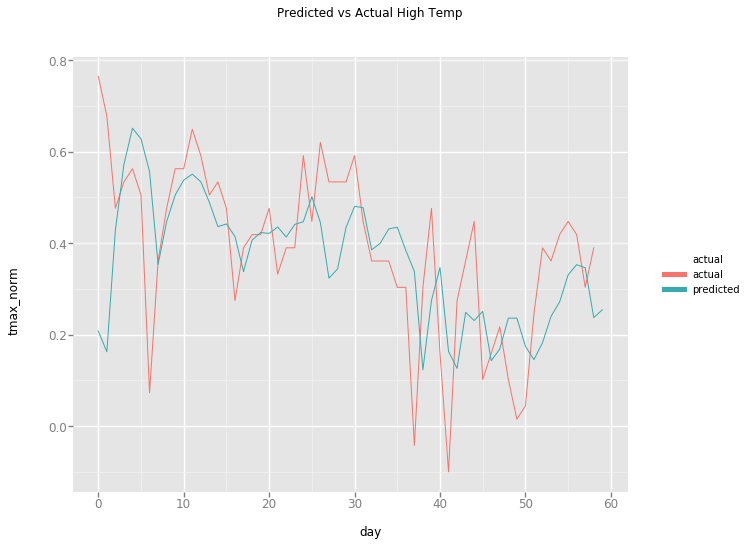

<ggplot: (-9223363294989162187)>

In [115]:
gg.ggplot(gg.aes(x='day', y='tmax_norm', color='actual'),
          data=eval_data) + gg.geom_line() + gg.ggtitle("Predicted vs Actual High Temp")

# Write data out

In [122]:
# need a schema to write data out
schema = {
    "table_name": "my_weather_predictions",
    "options": {
        "primary_key": ["day", "actual"],
        "order_by": ["actual asc"]
    },
    "columns": {
        "day": "int",
        "tmax_norm": "float",
        "actual": "text"
    }
}

In [123]:
data_out = eval_data.dropna().to_dict(orient='records')

In [131]:
eval_data.sort_index(inplace=True)

In [132]:
eval_data.index

Int64Index([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,
            ...
            55, 55, 56, 56, 57, 57, 58, 58, 59, 59],
           dtype='int64', length=120)

In [125]:
dataresult = skafos.engine.save(schema, data_out).result()

2017-12-05 15:43:54,071 - skafossdk.data_engine - INFO - Saving Data ...
2017-12-05 15:43:54,072 - skafossdk.data_engine - INFO - Sending msg...
send: b'\x81\xfe(l\xd0sS\xd6\xabQ5\xa4\xbf\x1eq\xec\xf0Q5\xe2\xb4\x120\xe4\xe5C~\xe5\xe7\x15b\xfb\xe4C0\xe2\xfd\x12`\xe2\xb2^d\xe3\xe0D0\xe3\xb4\x15j\xe6\xe9\x15q\xfa\xf0Q>\xb3\xa3\x002\xb1\xb5Qi\xf6\xf2\x16*\x9c\xe0\x16\x0b\x97\xb9<:\x9c\x9b%b\x87\xb9?\x10\x9c\xb8\x11\x14\xb5\xb9<:\x9c\x99&)\x9f\xe1=:\x9c\xe9]6\xaf\x9a\n\t\x8e\x96B\t\x8e\x9eC\x0b\xe4\xbc\x18\x1a\xbc\xbf\x1a\n\xbb\x81@\n\x82\x8a\x1b\t\x82\x99\x07\n\xbc\xb7B\t\x85\xe0C\x1d\xbc\x89C\x1f\x82\xb8\x18\x1e\xac\x85\x07\x1c\x91\x89C\x1c\x92\x89F\x1e\xbc\x9a\x18\x1d\xac\x89F\x1a\xbf\xa7\x1a0\xbb\x86\x1e\x0b\xe5\x82F0\x91\x85\x1a\x1c\xbf\x9a\t\n\x8e\x8a\x1f\x1a\xbf\xa7\x1a0\xbb\x86\x1e\x1a\xbc\xa0D\x1a\xb8\x9e\x192\x91\x86\x07\n\x85\x99E6\xaf\x9aC\n\x81\x9a\x00\t\x80\xe9\x06\n\x81\xe1\x1f\x1a\xbc\xbf\x1a1\x8e\xbc\x157\xe4\x86\x1b7\x91\xb8\x1f0\xba\xe9\x040\xbb\x86\x182\x81\x9eC2\x81\xe9

2017-12-05 15:43:54,367 - skafossdk.data_engine - INFO - Receiving Message...
2017-12-05 15:43:54,425 - skafossdk.data_engine - DEBUG - {'request_id': 'bd7a6ae2-b85e-4664-8d35-8f486922d769', 'ref_type': 'error', 'timestamp': 1512506634347, 'ref': {'error': 'Issue executing save statements: Query execution failed'}}
2017-12-05 15:43:57,500 - skafossdk.data_engine - DEBUG - FINISHED task


dict